In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pandas as pd
%matplotlib inline

In [2]:
%%bash
./calculate_force.py
cp force_displacement.txt force5seed1

In [3]:
class Analyser:
    
    def __init__(self,epsilon,seed):
        
        filename = "force"+str(epsilon)+"seed"+str(seed)
        data = np.loadtxt(filename)
        self.extension = data[:,1]
        self.force = data[:,0]
        self.force = self.force[self.extension>0]
        self.extension = self.extension[self.extension>0]

In [4]:
experiments = pd.read_csv("dataset.txt",delimiter="\t")


In [5]:
experimental_force = experiments.x.values
experimental_extension = experiments.y.values
e = np.sort(experimental_extension)
f = experimental_force[np.argsort(experimental_extension)]
experimental_force, experimental_extension = experimental_extension,experimental_force

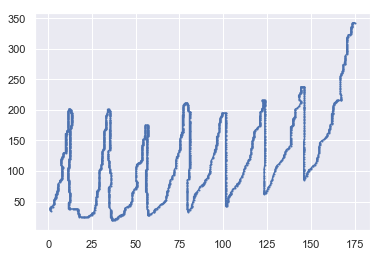

In [6]:
plt.plot(experimental_extension,experimental_force,marker='o',markersize=1)

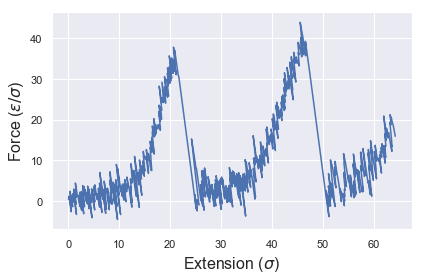

In [7]:
# single pulling experiment 
a = Analyser(5,1)
plt.plot(a.extension,a.force)
plt.xlabel(r'Extension ($\sigma$)',fontsize=16)
plt.ylabel(r'Force ($\varepsilon / \sigma$)',fontsize=16)
plt.tight_layout()
plt.savefig("simple_pulling.eps",format='eps',dpi=1200)

In [8]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

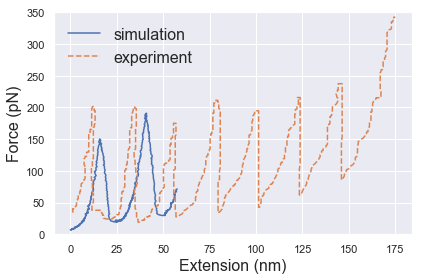

In [9]:
sigma = 0.643
force_conversion = (1.38*10**(-23)*298/(sigma*10**(-21))) 
a = Analyser(5,1)
new_size = running_mean(a.force,100).size
plt.plot(a.extension[:new_size],running_mean(a.force,100)*force_conversion,label="simulation")
plt.plot(experimental_extension,experimental_force,marker='o',linestyle='dashed',markersize=0,label="experiment")
plt.xlabel(r'Extension (nm)',fontsize=16)
plt.ylabel(r'Force (pN)',fontsize=16)
plt.tight_layout()
plt.legend(frameon=False,fontsize=16)
plt.ylim([0,350])
plt.savefig("simple_pulling.eps",format='eps',dpi=1200)

In [10]:
%%bash
cp simple_pulling.eps ~/Desktop